## Outlier:
An outlier is a data point in a data set the is distant from all other observation.
A data point that lies outside the overall distributionof the dataset.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [144]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [146]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [148]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


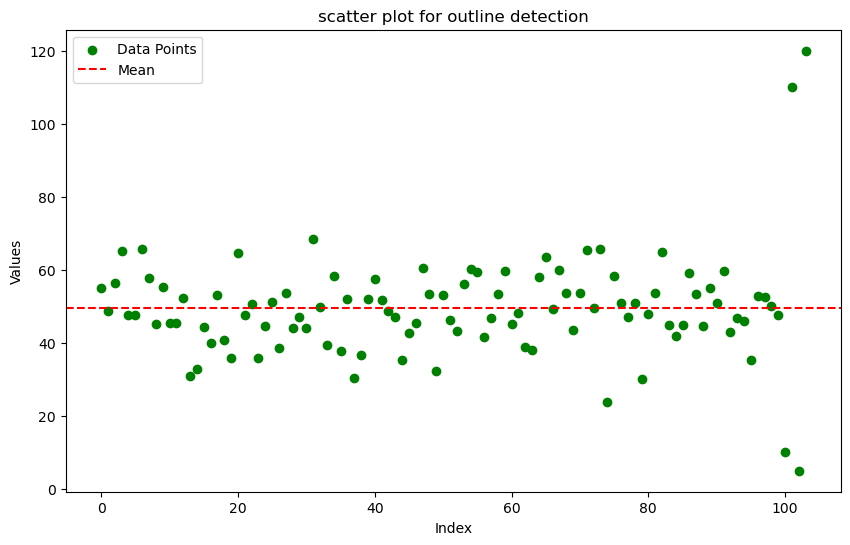

In [150]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(df)),df['Values'],color='green',label='Data Points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.title('scatter plot for outline detection')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()
            

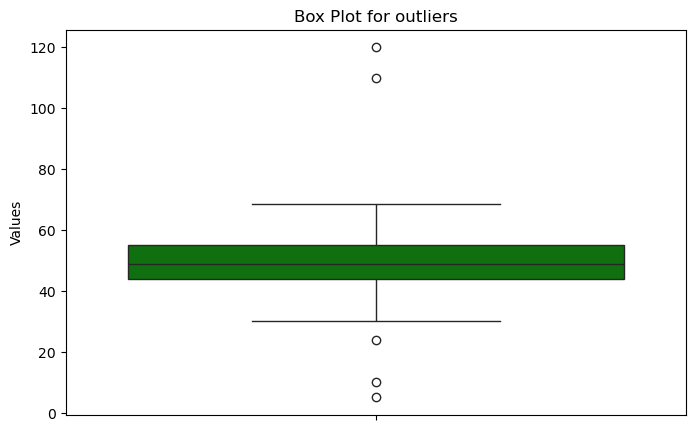

In [152]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values',color='green')
plt.title('Box Plot for outliers')
plt.show()

**z = (x - μ) / σ** 

x = Data point

μ = Mean of the dataset

σ = Standard deviation of the dataset


In [154]:
df['z-score']=zscore(df['Values'])
df['Outlier_Z']=df['z-score'].apply(lambda x: 'Outlier' if abs(x)>3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   z-score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


## Interquartile Range(IQR) method 

IQR=Q3-Q1

1.caluclate Q1 and Q3

2.Compute IQR=Q3-Q1

3.define lower and upper bounds:

**lower bound=Q1-1.5*IQR**

**upper bound=Q3+1.5*IQR**

In [156]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5 *IQR
df['Outlier_IQR']=df['Values'].apply(lambda x: 'Outlier' if (x < lower_bound or x> upper_bound) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])
                                     

         Values   z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


**finding outliers using the IQR method a 5 number summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

**The Interquartile Range (IQR) is calculated as:**
 
IQR=Q3−Q1
 
 Any value outside the range:
 
 [Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [158]:
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)
IQR = Q3 - Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5 *IQR
outliers=data[(data<lower_bound)|(data>upper_bound)]
print(f'5-Number summary:\nmin={min_value}\nQ1:{Q1}\nQ2:{Q2}\nQ3:{Q3}\nmax={max_value}')
print(f'IQR:{IQR}')
print(f'Lower bound: {lower_bound}\nUpper boound:{upper_bound}')
print(f'Outliers:{outliers}')

5-Number summary:
min=5.0
Q1:43.874401021766715
Q2:48.73043708220287
Q3:55.00852473036764
max=120.0
IQR:11.134123708600924
Lower bound: 27.17321545886533
Upper boound:71.70971029326903
Outliers:[ 23.80254896  10.         110.           5.         120.        ]
